In [21]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import csv
import re
import os




In [22]:
def draw_bounding_boxes(image, detections, threshold=0.25):
    for bbox, text, score in detections:
        if score > threshold:
            cv2.rectangle(image, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 5)
            cv2.putText(image, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.65, (255, 0, 0), 2)
    return image

def extract_speed_limit(detections):
    for _, text, score in detections:
        if score > 0.25:
            match = re.search(r'\d+', text)
            if match:
                return int(match.group())
    return None


Using CPU. Note: This module is much faster with a GPU.


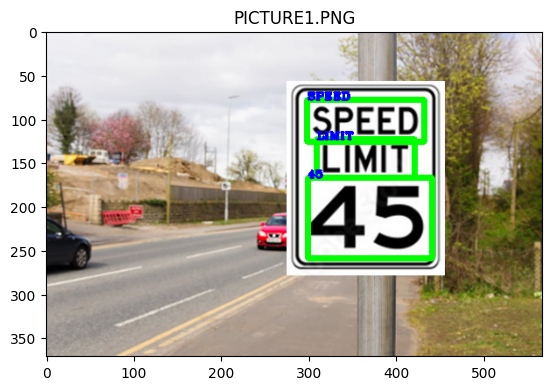

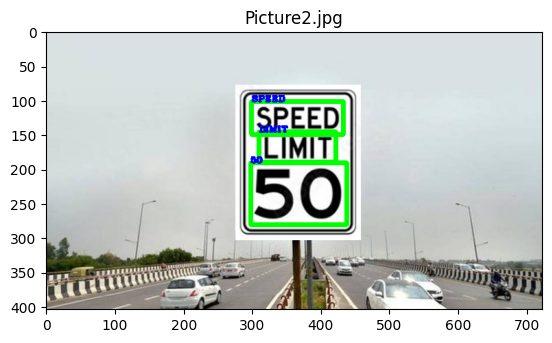

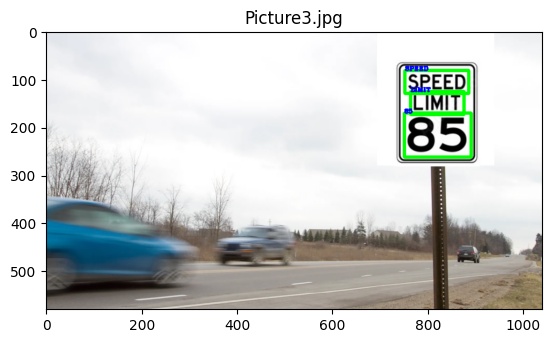

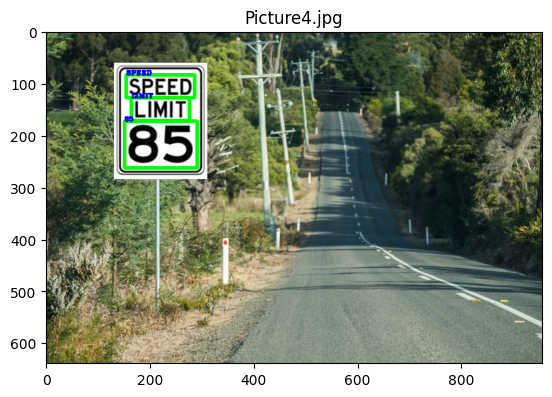

No text detected in the image Picture5.jpg.
Results saved to C:\Users\sreev\OneDrive\Desktop\college\KLA Workshop\result1.csv


In [23]:
def process_images_in_folder(folder_path, output_csv_path):
    reader = easyocr.Reader(['en'], gpu=False)
    results = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)

            if img is None:
                print(f"Error loading the image {filename}. Skipping...")
                continue

            text_detections = reader.readtext(img)
            if text_detections:
                img_with_boxes = draw_bounding_boxes(img, text_detections)
                plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGBA))
                plt.title(filename)
                plt.show()
            else:
                print(f"No text detected in the image {filename}.")

            speed_limit = extract_speed_limit(text_detections) if text_detections else None
            results.append([filename, speed_limit if speed_limit is not None else 'None'])

    with open(output_csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Speed Limit'])
        writer.writerows(results)

    print(f"Results saved to {output_csv_path}")

def main():
    folder_path = r"C:\Users\sreev\OneDrive\Desktop\college\KLA Workshop\DataSet\DataSet\Milestone 1"
    output_csv_path = r"C:\Users\sreev\OneDrive\Desktop\college\KLA Workshop\result1.csv"
    process_images_in_folder(folder_path, output_csv_path)

if __name__ == "__main__":
    main()